In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import scipy as sp
%matplotlib inline

In [471]:
#load provided csv file
df = pd.read_csv("fev.csv")
df

,age,height,sex,smoke,fev
0,9,57.0,0,0,1.708
1,8,67.5,0,0,1.724
2,7,54.5,0,0,1.720
3,9,53.0,1,0,1.558
4,9,57.0,1,0,1.895
...,...,...,...,...,...
649,16,67.0,1,1,4.270
650,15,68.0,1,1,3.727
651,18,60.0,0,0,2.853
652,16,63.0,0,1,2.795


In [472]:
df.describe()

,age,height,sex,smoke,fev
count,654.000000,654.000000,654.000000,654.000000,654.000000
mean,9.931193,61.143578,0.513761,0.099388,2.636780
std,2.953935,5.703513,0.500193,0.299412,0.867059
min,3.000000,46.000000,0.000000,0.000000,0.791000
25%,8.000000,57.000000,0.000000,0.000000,1.981000
50%,10.000000,61.500000,1.000000,0.000000,2.547500
75%,12.000000,65.500000,1.000000,0.000000,3.118500
max,19.000000,74.000000,1.000000,1.000000,5.793000


In [473]:
#4 subgroups can be created with the two categorical variables
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]

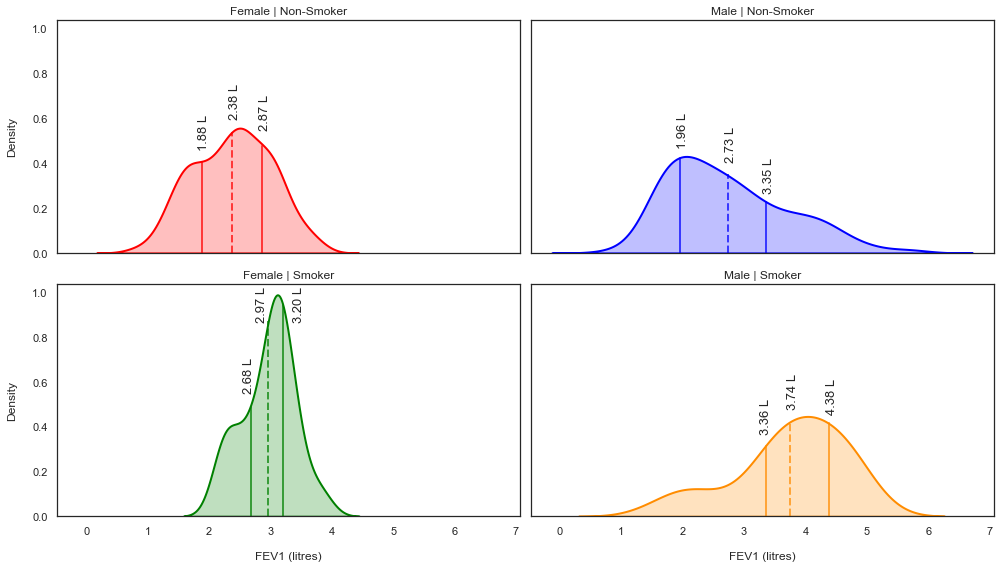

In [474]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(14,8), tight_layout=True, sharex=True, sharey=True)

sns.kdeplot(df_F_nonsmoker.fev, ax=ax[0,0], color="red", shade=True, linewidth=2)
ax[0,0].axvline(x=df_F_nonsmoker.fev.mean(), ymin=0, ymax=0.52, linestyle = '--', alpha =0.7, color="red", linewidth=2)
ax[0,0].axvline(np.quantile(df_F_nonsmoker.fev,0.25), ymin=0, ymax=0.39, linestyle = '-', alpha =0.7, color="red", linewidth=2)
ax[0,0].axvline(np.quantile(df_F_nonsmoker.fev,0.75), ymin=0, ymax=0.46, linestyle = '-', alpha =0.7, color="red", linewidth=2)
ax[0,0].set_xlabel("FEV1 (litres)", labelpad=15)
ax[0,0].set_ylabel("Density", labelpad=15)
ax[0,0].set_title("Female | Non-Smoker")
ax[0,0].text(np.quantile(df_F_nonsmoker.fev,0.25)-0.05,0.47,'%0.2f L' % np.quantile(df_F_nonsmoker.fev,0.25),rotation=90,size=13)
ax[0,0].text(df_F_nonsmoker.fev.mean()-0.05,0.61,'%0.2f L' % df_F_nonsmoker.fev.mean(),rotation=90,size=13)
ax[0,0].text(np.quantile(df_F_nonsmoker.fev,0.75)-0.05,0.56,'%0.2f L' % np.quantile(df_F_nonsmoker.fev,0.75),rotation=90,size=13)

sns.kdeplot(df_M_nonsmoker.fev, ax=ax[0,1], color="blue", shade=True, linewidth=2)
ax[0,1].axvline(x=df_M_nonsmoker.fev.mean(), ymin=0, ymax=0.34, linestyle = '--', alpha =0.7, color="blue", linewidth=2)
ax[0,1].axvline(np.quantile(df_M_nonsmoker.fev,0.25), ymin=0, ymax=0.41, linestyle = '-', alpha =0.7, color="blue", linewidth=2)
ax[0,1].axvline(np.quantile(df_M_nonsmoker.fev,0.75), ymin=0, ymax=0.22, linestyle = '-', alpha =0.7, color="blue", linewidth=2)
ax[0,1].set_title("Male | Non-Smoker")
ax[0,1].text(np.quantile(df_M_nonsmoker.fev,0.25)-0.05,0.48,'%0.2f L' % np.quantile(df_M_nonsmoker.fev,0.25),rotation=90,size=13)
ax[0,1].text(df_M_nonsmoker.fev.mean()-0.05,0.42,'%0.2f L' % df_M_nonsmoker.fev.mean(),rotation=90,size=13)
ax[0,1].text(np.quantile(df_M_nonsmoker.fev,0.75)-0.05,0.28,'%0.2f L' % np.quantile(df_M_nonsmoker.fev,0.75),rotation=90,size=13)

sns.kdeplot(df_F_smoker.fev, ax=ax[1,0], color="green", shade=True, linewidth=2)
ax[1,0].axvline(x=df_F_smoker.fev.mean(), ymin=0, ymax=0.84, linestyle = '--', alpha =0.7, color="green", linewidth=2)
ax[1,0].axvline(np.quantile(df_F_smoker.fev,0.25), ymin=0, ymax=0.47, linestyle = '-', alpha =0.7, color="green", linewidth=2)
ax[1,0].axvline(np.quantile(df_F_smoker.fev,0.75), ymin=0, ymax=0.91, linestyle = '-', alpha =0.7, color="green", linewidth=2)
ax[1,0].set_xlabel("FEV1 (litres)", labelpad=15)
ax[1,0].set_ylabel("Density", labelpad=15)
ax[1,0].set_title("Female | Smoker")
ax[1,0].text(np.quantile(df_F_smoker.fev,0.25)-0.12,0.56,'%0.2f L' % np.quantile(df_F_smoker.fev,0.25),rotation=90,size=13)
ax[1,0].text(df_F_smoker.fev.mean()-0.20,0.88,'%0.2f L' % df_F_smoker.fev.mean(),rotation=90,size=13)
ax[1,0].text(np.quantile(df_F_smoker.fev,0.75)+0.17,0.88,'%0.2f L' % np.quantile(df_F_smoker.fev,0.75),rotation=90,size=13)

sns.kdeplot(df_M_smoker.fev, ax=ax[1,1], color="darkorange", shade=True, linewidth=2)
ax[1,1].axvline(x=df_M_smoker.fev.mean(), ymin=0, ymax=0.41, linestyle = '--', alpha =0.7, color="darkorange", linewidth=2)
ax[1,1].axvline(np.quantile(df_M_smoker.fev,0.25), ymin=0, ymax=0.30, linestyle = '-', alpha =0.7, color="darkorange", linewidth=2)
ax[1,1].axvline(np.quantile(df_M_smoker.fev,0.75), ymin=0, ymax=0.40, linestyle = '-', alpha =0.7, color="darkorange", linewidth=2)
ax[1,1].set_xlabel("FEV1 (litres)", labelpad=15)
ax[1,1].set_title("Male | Smoker")
ax[1,1].text(np.quantile(df_M_smoker.fev,0.25)-0.1,0.38,'%0.2f L' % np.quantile(df_M_smoker.fev,0.25),rotation=90,size=13)
ax[1,1].text(df_M_smoker.fev.mean()-0.05,0.49,'%0.2f L' % df_M_smoker.fev.mean(),rotation=90,size=13)
ax[1,1].text(np.quantile(df_M_smoker.fev,0.75)-0.05,0.47,'%0.2f L' % np.quantile(df_M_smoker.fev,0.75),rotation=90,size=13)


plt.show()

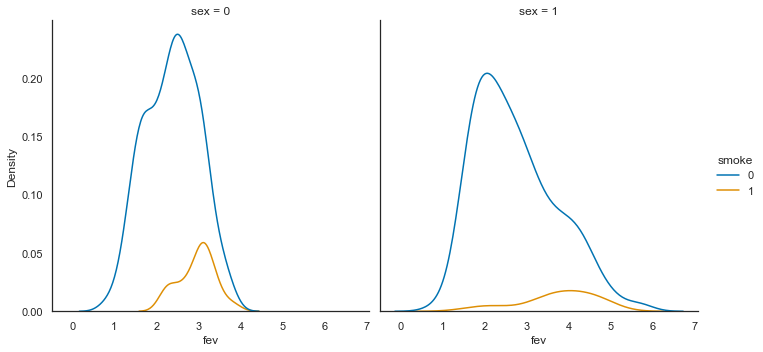

In [475]:
sns.displot(data=df, x="fev", hue="smoke", col="sex", kind="kde", palette="colorblind")
#place mean lines


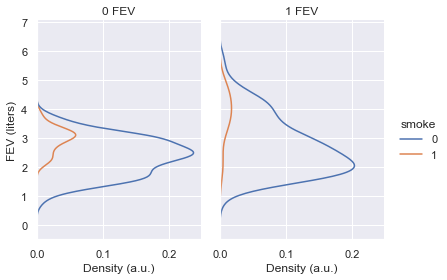

In [173]:
g = sns.displot(data=df, y="fev", hue="smoke", col="sex",kind="kde", height=4, aspect=.7)
g.set_axis_labels("Density (a.u.)", "FEV (liters)")
g.set_titles("{col_name} FEV")

Text(0.5, 1.0, 'Age and Height of Sample (n=654)')

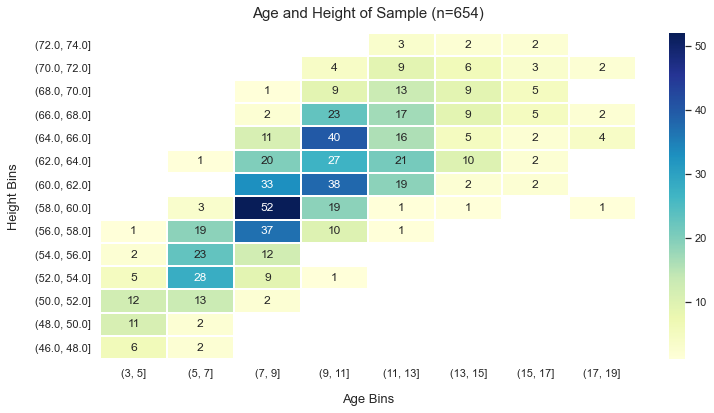

In [476]:

sns.set(rc = {'figure.figsize':(12,6)})
sns.set_style("white")
#height min and max
height_min = min(df['height'])
height_max = max(df['height'])

#age min and max
age_min = min(df['age'])
age_max = max(df['age'])

height_bins_step = 2
height_bins = np.arange(height_min, height_max+height_bins_step, height_bins_step)

age_bins_step = 2
age_bins = np.arange(age_min, age_max+age_bins_step, age_bins_step)

df['height_binned'] = pd.cut(df['height'], height_bins)
df['age_binned'] = pd.cut(df['age'], age_bins)

df_new = df.groupby(['height_binned', 'age_binned']).size().reset_index(name='count') #wrangle count data
df_new = df_new.pivot("height_binned", "age_binned", "count")

ax = sns.heatmap(df_new, annot=True, fmt="d", cmap="YlGnBu", linewidths=1.0, mask=(df_new==0))
plt.ylim(reversed(plt.ylim()))
ax.set_xlabel("Age Bins", labelpad=15, size=13)
ax.set_ylabel("Height Bins", labelpad=15, size=13)
ax.set_title("Age and Height of Sample (n=654)", size=15, pad=15)



In [479]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)

<ipython-input-479-fbb5e2cae805>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-479-fbb5e2cae805>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-479-fbb5e2cae805>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-479-fbb

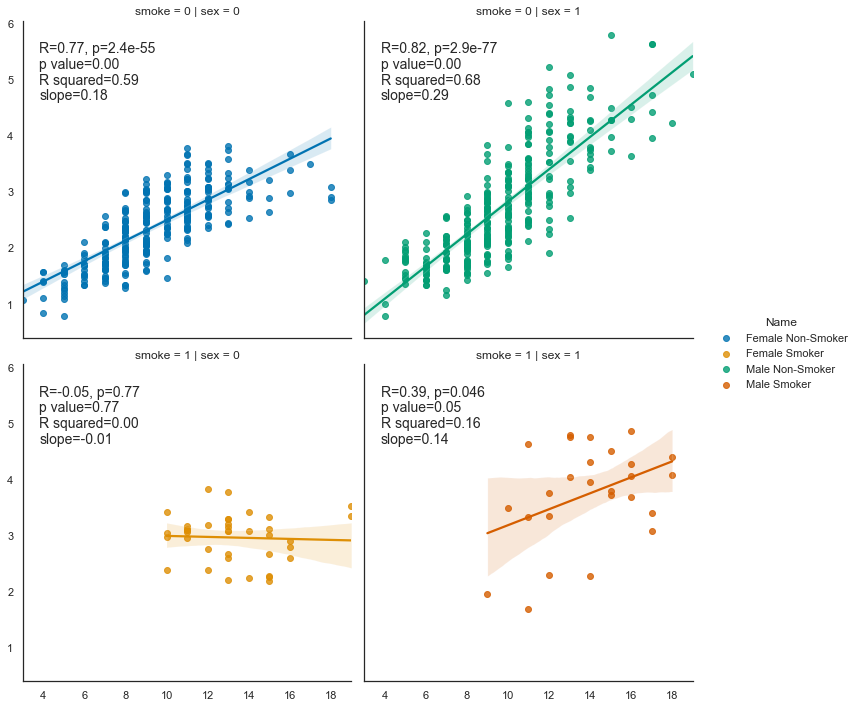

In [509]:
g = sns.lmplot(x='age', y='fev', data=df, col='sex', row="smoke", hue="Name", palette='colorblind')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['age'], data['fev'])
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data['age'],data['fev'])
    ax = plt.gca()
    ax.text(.05, .9, 'R={:.2f}, p={:.2g}'.format(r, p), size=14,
            transform=ax.transAxes)
    ax.text(.05, .85, 'p value={:.2f}'.format(p), size=14,
            transform=ax.transAxes)
    ax.text(.05, .8, 'R squared={:.2f}'.format((r_value*r_value)), size=14,
            transform=ax.transAxes)
    ax.text(.05, .75, 'slope={:.2f}'.format(slope), size=14,
            transform=ax.transAxes)
    
g.map_dataframe(annotate)


plt.show()

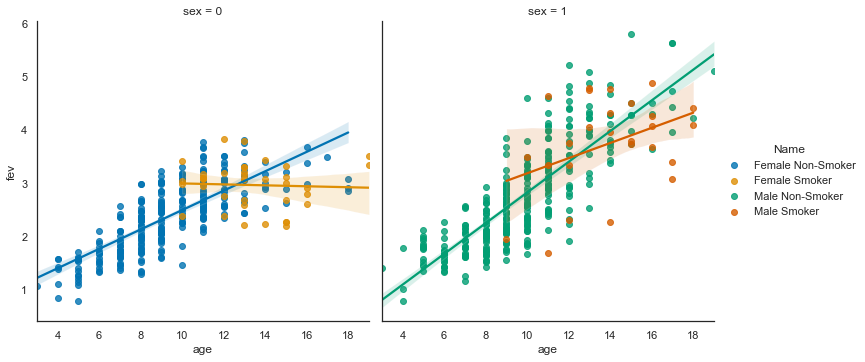

In [510]:
g = sns.lmplot(x='age', y='fev', data=df, col='sex', hue='Name', palette='colorblind')

plt.show()

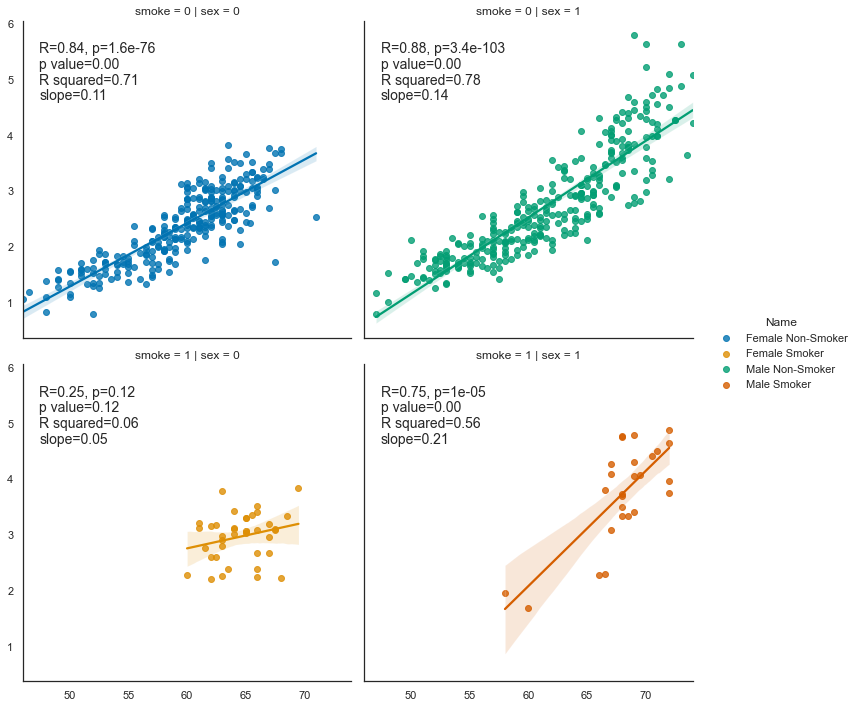

In [514]:
g = sns.lmplot(x='height', y='fev', data=df, col='sex', row="smoke", hue="Name", palette='colorblind')

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['height'], data['fev'])
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(data['height'],data['fev'])
    ax = plt.gca()
    ax.text(.05, .9, 'R={:.2f}, p={:.2g}'.format(r, p), size=14,
            transform=ax.transAxes)
    ax.text(.05, .85, 'p value={:.2f}'.format(p), size=14,
            transform=ax.transAxes)
    ax.text(.05, .8, 'R squared={:.2f}'.format((r_value*r_value)), size=14,
            transform=ax.transAxes)
    ax.text(.05, .75, 'slope={:.2f}'.format(slope), size=14,
            transform=ax.transAxes)
    
g.map_dataframe(annotate)


plt.show()

In [483]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df_F = pd.concat([df_F_nonsmoker, df_F_smoker], axis=0)
df_M = pd.concat([df_M_nonsmoker, df_M_smoker], axis=0)

<ipython-input-483-16915ced208d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-483-16915ced208d>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-483-16915ced208d>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-483-169

<Figure size 1080x576 with 0 Axes>

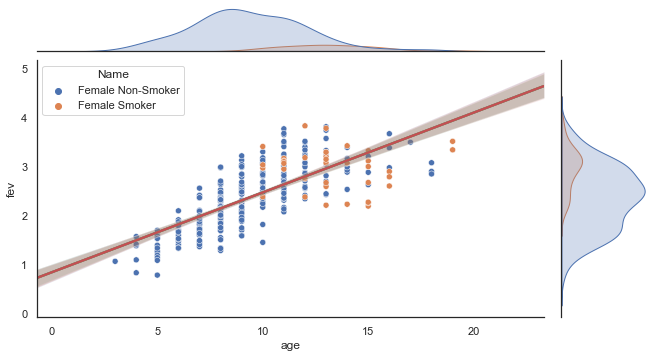

In [484]:
plt.figure(figsize = (15,8))
g = sns.jointplot(data=df_F, x="age", y="fev", hue="Name")

for _,gr in df.groupby("Name"):
    sns.regplot(x="age", y="fev", data=df_F, scatter=False, ax=g.ax_joint, truncate=False)

g.fig.set_size_inches(10,5)
plt.show()

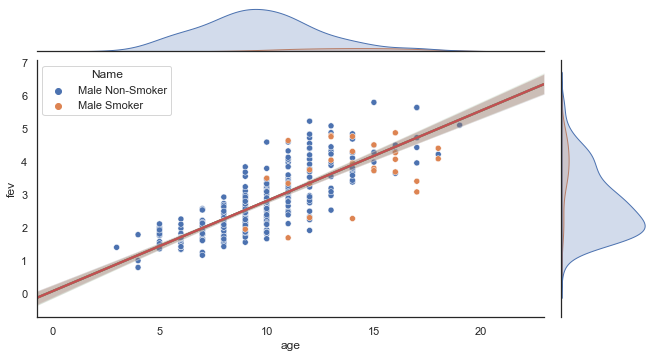

In [485]:


g = sns.jointplot(data=df_M, x="age", y="fev", hue="Name")

for _,gr in df.groupby("Name"):
    sns.regplot(x="age", y="fev", data=df_M, scatter=False, ax=g.ax_joint, truncate=False)

g.fig.set_size_inches(10,5)
plt.show()

In [389]:

df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)






<ipython-input-389-6d83f8cf80e2>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-389-6d83f8cf80e2>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-389-6d83f8cf80e2>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-389-6d8

In [196]:

fig = px.scatter_3d(df, x='age', y='fev', z='height',
              color='Name')
fig.show()

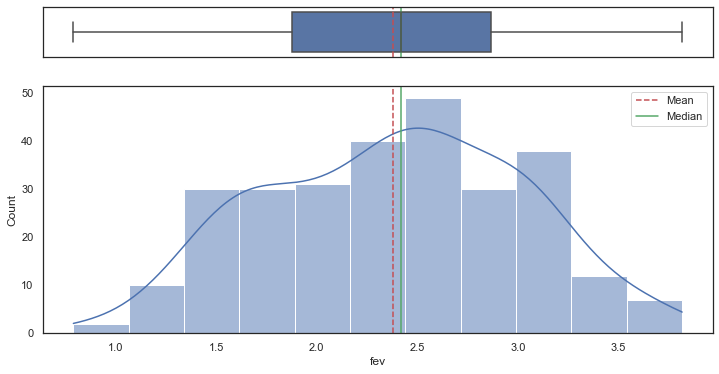

In [486]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_F_nonsmoker['fev'].mean()
median=df_F_nonsmoker['fev'].median()
mode=df_F_nonsmoker['fev'].mode().values[0]

sns.boxplot(data=df_F_nonsmoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df_F_nonsmoker, x="fev", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

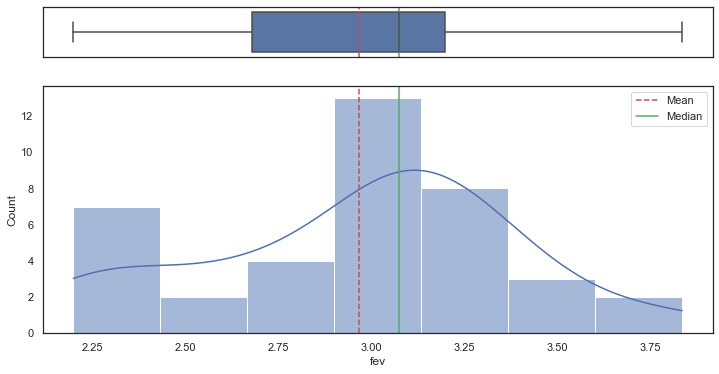

In [487]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_F_smoker['fev'].mean()
median=df_F_smoker['fev'].median()
mode=df_F_smoker['fev'].mode().values[0]

sns.boxplot(data=df_F_smoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df_F_smoker, x="fev", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

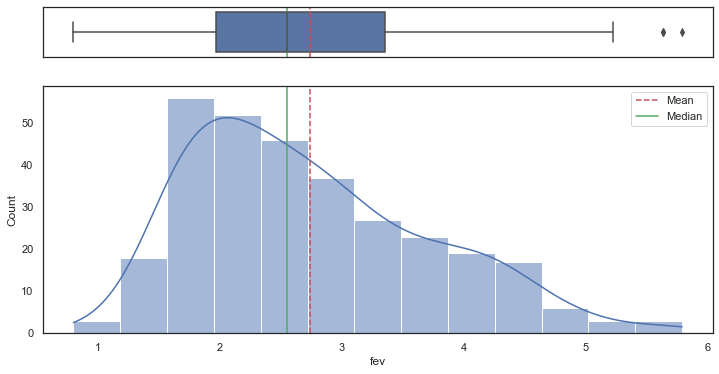

In [488]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_M_nonsmoker['fev'].mean()
median=df_M_nonsmoker['fev'].median()
mode=df_M_nonsmoker['fev'].mode().values[0]

sns.boxplot(data=df_M_nonsmoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df_M_nonsmoker, x="fev", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

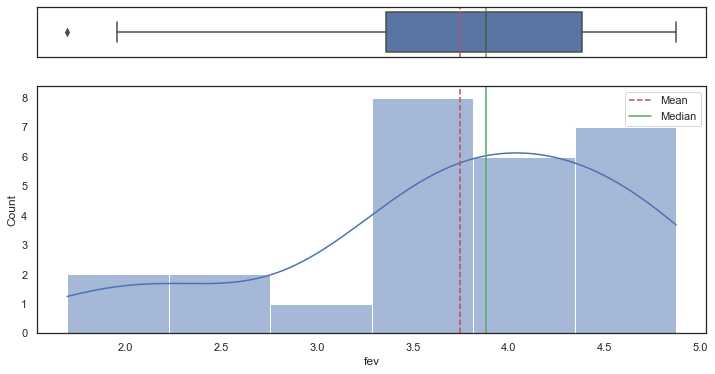

In [489]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_M_smoker['fev'].mean()
median=df_M_smoker['fev'].median()
mode=df_M_smoker['fev'].mode().values[0]

sns.boxplot(data=df_M_smoker, x="fev", ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.histplot(data=df_M_smoker, x="fev", ax=ax_hist, kde=True)
ax_hist.axvline(mean, color='r', linestyle='--', label="Mean")
ax_hist.axvline(median, color='g', linestyle='-', label="Median")

ax_hist.legend()

ax_box.set(xlabel='')
plt.show()

<ipython-input-532-b2bb263be636>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-532-b2bb263be636>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



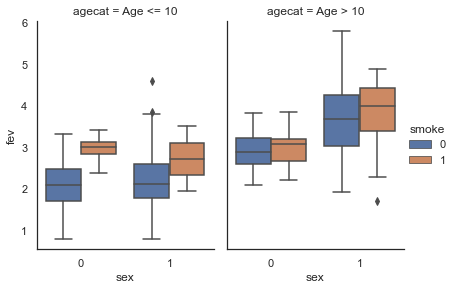

In [532]:
df = pd.read_csv("fev.csv")
df

#make a sns grid cut be age categories ()

df_young = df[(df['age'] <= 10)]
df_young['agecat'] = "Age <= 10"
df_old = df[(df['age'] > 10)]
df_old['agecat'] = "Age > 10"

df_box = pd.concat([df_young, df_old], axis=0)

#patients that smoked at a young age were maybe more physically mature and large and therefore prone to smoke
#fev is a proxy for physical development 

g = sns.catplot(x="sex", y="fev",
                hue="smoke", col="agecat",
                data=df_box, kind="box",
                height=4, aspect=.7)


<ipython-input-541-6d31596927be>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-541-6d31596927be>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-541-6d31596927be>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-541-6

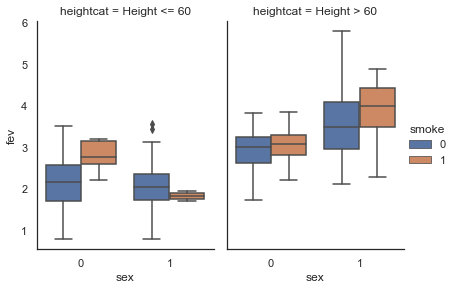

In [541]:
df = pd.read_csv("fev.csv")
df

df_M = df[(df['sex'] == 1)]
df_F = df[(df['sex'] == 0)]

df_short_M = df_M[(df_M['height'] <= 62.5)]
df_short_M['heightcat'] = "Height <= 60"
df_tall_M = df_M[(df_M['height'] > 62.5)]
df_tall_M['heightcat'] = "Height > 60"

df_short_F = df_F[(df_F['height'] <= 62.5)]
df_short_F['heightcat'] = "Height <= 60"
df_tall_F = df_F[(df_F['height'] > 62.5)]
df_tall_F['heightcat'] = "Height > 60"

df_box_height = pd.concat([df_short_M, df_tall_M, df_short_F, df_tall_F], axis=0)

#patients that smoked at a young age were maybe more physically mature and large and therefore prone to smoke
#fev is a proxy for physical development 

g = sns.catplot(x="sex", y="fev",
                hue="smoke", col="heightcat",
                data=df_box_height, kind="box",
                height=4, aspect=.7)

<ipython-input-542-3c02099fdad8>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-542-3c02099fdad8>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-542-3c02099fdad8>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-542-3c0

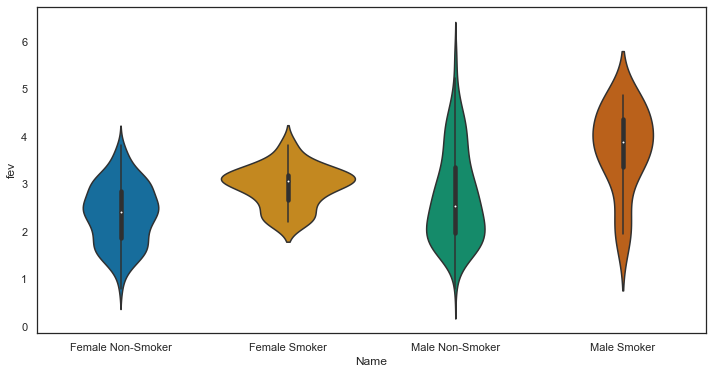

In [542]:
df_F_nonsmoker = df[(df['sex'] == 0) & (df['smoke'] == 0 )]
df_F_nonsmoker['Name'] = ('Female Non-Smoker')

df_F_smoker = df[(df['sex'] == 0) & (df['smoke'] == 1 )]
df_F_smoker['Name'] = ('Female Smoker')

df_M_nonsmoker = df[(df['sex'] == 1) & (df['smoke'] == 0 )]
df_M_nonsmoker['Name'] = ('Male Non-Smoker')

df_M_smoker = df[(df['sex'] == 1) & (df['smoke'] == 1 )]
df_M_smoker['Name'] = ('Male Smoker')

df = pd.concat([df_F_nonsmoker, df_F_smoker, df_M_nonsmoker, df_M_smoker], axis=0)

ax = sns.violinplot(x="Name", y="fev", palette="colorblind", data=df, dodge=False)

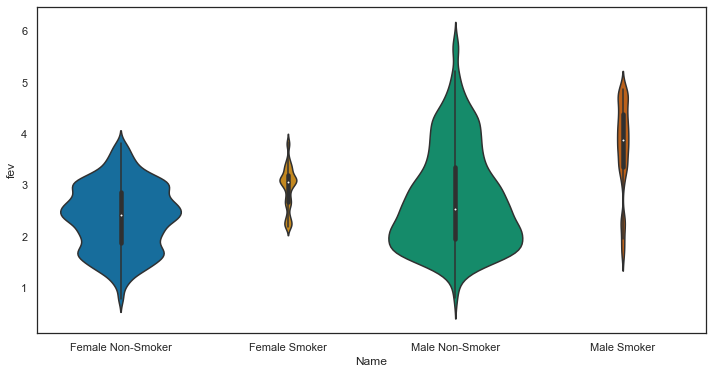

In [548]:
ax = sns.violinplot(x="Name", y="fev", data=df, palette="colorblind", split=True, scale="count", scale_hue=False, bw=0.2)